🚨

**STARTING COLAB NOTEBOOK FOR MY STUDY OF MACHINE LEARNING**
---
---
---

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**



> **ML STEPS (https://github.com/Amasa614/College-Placement-Prediction-Models/blob/main/College%20Placement%20predictions%20using%203%20models.ipynb and https://youtu.be/dr7z7a_8lQw?list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&t=219)**

🌟 0. The WHOLE PROCESS is called ***Exploratory Data Analysis***

🌟 1. Taking idea on Feature Selection at first glance + Preprocess

🌟 2. Statistics

🌟 3. Data Visualization

🌟 4. Train_Test_Split and Scaling

🌟 5. Training

🌟 6. Evaluation

🌟 λ. Bonus (Linear Regression)

🌟 7. Testing

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/placement.csv')
df.head(3)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0


In [ ]:
df.info() #we can see no row has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


# **🌟 1. Taking idea on Feature Selection at first glance + Preprocess**



> *We did not do 'Feature Selection' here because there is nothing to select here as this is a beginner dataset*



In [ ]:
df = df.drop('Unnamed: 0', axis=1) #IMPORTANT: When you use df.iloc[:, 0:], you’re selecting all columns starting from the first column (index 0) to the last column. This effectively means you’re not removing any columns. On the other hand, when you use df.iloc[:, 1:], you’re selecting all columns starting from the second column (index 1) to the last column, which removes the first column. For this complexity I think I NEVER SHOULD N' WOULD USE ILOC FOR PREPROCESSING. BEST IS DROP PERHAPS
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


# **🌟 2. Statistics**

In [ ]:
df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


# **🌟 3. Data Visualization**



> *Data Visualization uses for get an idea of the data. It also gives idea about which algorithm might fit best. For example, here, the best fit maybe 'Logistic Regression'. More specifically 'binary classification (because the output is like 0 or 1, yes or no, true or false etc.) Logistic Regression'. See the visualizations below:*



Text(0.5, 1.0, 'Scatterplot of IQ and CGPA')

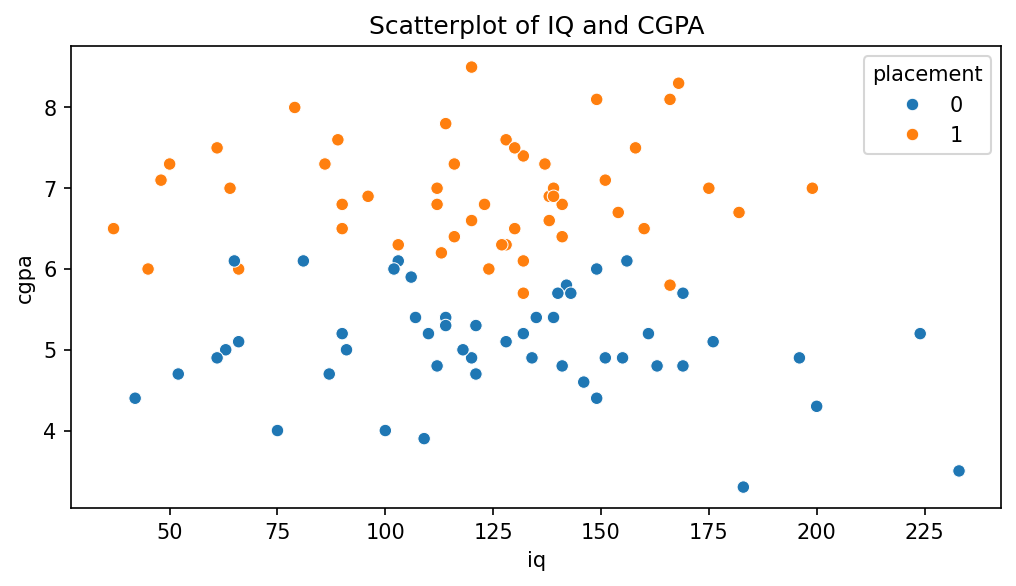

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4), dpi=150)
sns.scatterplot(data=df, y='cgpa', x='iq', hue='placement')
plt.title('Scatterplot of IQ and CGPA')

In [ ]:
df[['placement']].value_counts() #IMPORTANTTTTTTTTTTTTTTTTT: ALWAYS GIVE DOUBLE BRACKETS '[[]]' TO ANY COLUMN WHICH IS DECISIVE. SINGLE COLUMN MAKES IT 1D AND STANDARD SCALER REQUIRES 2D COLUMN FOR OPERATIONS. HENCE, SINGLE COLUMN MOST LIKELY STUMBLE ME ON ERROR. I GUESS...

,count
placement,
0,50
1,50


Text(0.5, 1.0, 'Distribution of Student IQ')

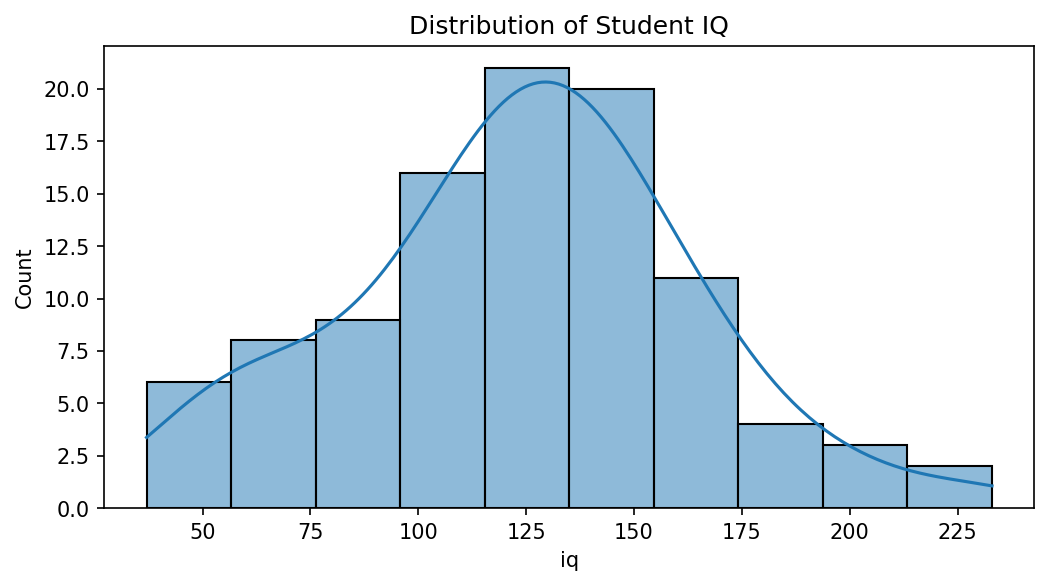

In [ ]:
plt.figure(figsize=(8,4), dpi=150)
sns.histplot(data=df, x='iq', kde=True) #kernel density estimate (KDE) line to the histogram, which provides a smoothed estimate of the data distribution
plt.title('Distribution of Student IQ')

Text(0.5, 1.0, 'Distribution of Student CGPA')

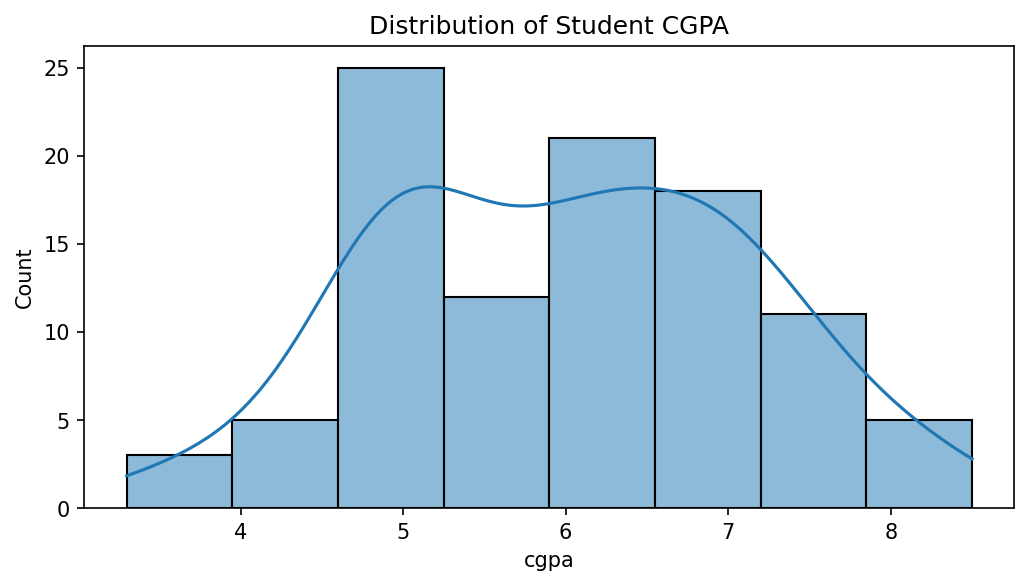

In [ ]:
plt.figure(figsize=(8,4), dpi=150)
sns.histplot(data=df, x='cgpa', kde=True)
plt.title('Distribution of Student CGPA')

# **🌟 4. Train_Test_Split and Scaling**

In [ ]:
X = df.drop('placement', axis=1) #features
y = df['placement'] #target variable

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
#Train_Test_Split
#Train_Test_Split done before 'Scale the values' as good practice because by this we organize the data first
from sklearn.model_selection import train_test_split

train_test_split(X, y, test_size=0.2, random_state=101) #Using the same random_state value ensures that the split is reproducible. This means that every time you run the train_test_split function with the same random_state on the same dataset, you will get the same 80% training and 20% test split. In other words, the split is deterministic and reproducible. If you run the train_test_split function again with the same random_state on the same dataset, the same values (rows) will be assigned to the training and test sets as in the previous split

[    cgpa     iq
 61   7.3  137.0
 47   5.2  161.0
 54   6.4  141.0
 57   6.5  130.0
 2    5.3  121.0
 ..   ...    ...
 63   6.3  128.0
 70   6.3  127.0
 81   5.4  107.0
 11   6.9  138.0
 95   4.3  200.0
 
 [80 rows x 2 columns],
     cgpa     iq
 16   5.2  224.0
 1    5.9  106.0
 43   6.8  141.0
 67   5.0  118.0
 89   4.9  151.0
 21   7.1  151.0
 97   6.7  182.0
 51   4.8  141.0
 6    5.7  143.0
 41   5.4  114.0
 82   6.5   37.0
 25   5.0   91.0
 45   6.0   66.0
 68   4.0   75.0
 37   8.1  149.0
 31   3.9  109.0
 50   3.5  233.0
 32   7.0  139.0
 3    7.4  132.0
 48   6.6  138.0,
 61    1
 47    0
 54    1
 57    1
 2     0
      ..
 63    1
 70    1
 81    0
 11    1
 95    0
 Name: placement, Length: 80, dtype: int64,
 16    0
 1     0
 43    1
 67    0
 89    0
 21    1
 97    1
 51    0
 6     0
 41    0
 82    1
 25    0
 45    1
 68    0
 37    1
 31    0
 50    0
 32    1
 3     1
 48    1
 Name: placement, dtype: int64]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
X_train

,cgpa,iq
61,7.3,137.0
47,5.2,161.0
54,6.4,141.0
57,6.5,130.0
2,5.3,121.0
...,...,...
63,6.3,128.0
70,6.3,127.0
81,5.4,107.0
11,6.9,138.0


In [ ]:
y_train

,placement
61,1
47,0
54,1
57,1
2,0
...,...
63,1
70,1
81,0
11,1


In [ ]:
X_test

,cgpa,iq
16,5.2,224.0
1,5.9,106.0
43,6.8,141.0
67,5.0,118.0
89,4.9,151.0
21,7.1,151.0
97,6.7,182.0
51,4.8,141.0
6,5.7,143.0
41,5.4,114.0


In [ ]:
y_test

,placement
16,0
1,0
43,1
67,0
89,0
21,1
97,1
51,0
6,0
41,0


In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler

#Creating an StandardScaler object to work with 'that object'
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train) #The fit_transform() method in scikit-learn is a convenient way to perform both fitting and transforming operations on your data in a single step. This method is commonly used in data preprocessing and feature scaling. This method first computes the mean and standard deviation of 'X_train' and then scales the data to have zero mean and unit variance. The transformed data is stored in 'scaled_X_train'
                                               #Fit: The method first computes the necessary statistics (like mean and standard deviation for scaling) from the training data.
                                               #Transform: It then applies the transformation to the data based on the computed statistics.



> **Practical Considerations for fit_transform():**

**Consistency:** Always use fit_transform() on the training data and transform() on the test data to ensure consistency in preprocessing.

**Avoiding Data Leakage:** Using fit_transform() on the entire dataset (including test data) can lead to data leakage, where information from the test set influences the training process.

In [ ]:
scaled_X_train #IMPORTANT: NOTICE THAT MAXIMUM VALUES ARE BETWEEN -1 to 1 (WHICH IS THE STANDARD). Hence, Scaled. But can you understand which values or better say rows where?! This was the reason that 'train_test_split' was performed first

array([[ 1.13045861,  0.41197993],
       [-0.76114544,  1.04885713],
       [ 0.31977116,  0.51812613],
       [ 0.40984754,  0.22622409],
       [-0.67106906, -0.01260486],
       [ 0.31977116, -0.14528761],
       [ 0.04954201, -1.07406685],
       [ 1.7609933 , -1.12713995],
       [-0.31076352,  1.26114952],
       [ 1.31061138,  0.96924748],
       [-0.85122182,  0.17315099],
       [ 0.04954201, -0.49026276],
       [-1.21152736, -0.91484755],
       [ 0.86022946,  2.05724601],
       [-1.03137459, -0.03914141],
       [ 0.04954201,  0.27929719],
       [-0.04053437,  0.06700479],
       [ 0.49992393, -0.03914141],
       [ 1.85106968,  1.18153987],
       [ 1.40068776,  0.17315099],
       [ 0.68007669, -0.8352379 ],
       [ 0.59000031,  0.86310128],
       [ 2.21137521, -0.03914141],
       [-1.21152736, -0.01260486],
       [ 0.40984754, -0.8352379 ],
       [-0.04053437,  0.73041853],
       [ 2.03122245,  1.23461297],
       [ 0.22969478, -0.49026276],
       [-2.47259672,

In [ ]:
scaled_X_test = scaler.transform(X_test) #SEEEEEEEEEEEE: 'transform()' for test
scaled_X_test

array([[-0.76114544,  2.72065976],
       [-0.13061076, -0.41065311],
       [ 0.68007669,  0.51812613],
       [-0.94129821, -0.09221451],
       [-1.03137459,  0.78349163],
       [ 0.95030584,  0.78349163],
       [ 0.59000031,  1.60612467],
       [-1.12145097,  0.51812613],
       [-0.31076352,  0.57119923],
       [-0.58099267, -0.19836071],
       [ 0.40984754, -2.24167503],
       [-0.94129821, -0.80870135],
       [-0.04053437, -1.47211509],
       [-1.84206204, -1.23328615],
       [ 1.85106968,  0.73041853],
       [-1.93213842, -0.33104346],
       [-2.29244396,  2.9594887 ],
       [ 0.86022946,  0.46505303],
       [ 1.22053499,  0.27929719],
       [ 0.49992393,  0.43851648]])

In [ ]:
type(y) #Series?!! Seems the previous '1D-2D' thing was bogus!! Feeling angry!!

pandas.core.series.Series

# **🌟 5. Training**



> ***LOGISTIC REGRESSION***

[Logistic Regression is a statistical method for binary classification problems, which predicts the probability of a binary outcome (e.g., yes/no, true/false) based on one or more predictor variables. Logistic Regression is widely used for binary classification problems because it is simple, interpretable, and effective. It models the probability that a given input belongs to a particular class using the logistic function, which outputs values between 0 and 1]

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression() #Here, an instance of the LogisticRegression class is created. This object will be used to fit the logistic regression model to the training data. You can customize the model by passing various parameters to the LogisticRegression constructor, but in this case, it uses the default settings

log_model.fit(scaled_X_train,y_train) #'log_model' is 'fitted' onto the 'standardized X trained data' and 'y_train'. The 'fit()' method is called on the logistic regression model object 'log_model', using the standardized training data 'scaled_X_train' and the corresponding target values 'y_train'. This method trains the logistic regression model by finding the best-fitting parameters that map the input features to the target variable

LogisticRegression()



> **IMPORTANT: In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

**A. Jupyter Environment:**
When you run the code cell in a Jupyter Notebook, the output is typically displayed directly below the cell. This output can include rich HTML representations of objects, which are often more informative and visually appealing.
The note suggests rerunning the cell to ensure that the HTML representation of the LogisticRegression object is properly displayed. This can be necessary if the notebook was not trusted initially, as Jupyter Notebooks have a security feature that requires you to trust the notebook to render HTML and JavaScript content.

**B. GitHub:**
When viewing Jupyter Notebooks on GitHub, the HTML representation of objects may not render correctly. GitHub’s rendering engine for notebooks is limited and does not support all the rich output formats that Jupyter does.
The author suggests using nbviewer.org, a web service that renders Jupyter Notebooks in a way that supports rich HTML representations. By loading the notebook on nbviewer.org, you can see the full output as intended.

This ensures that you can see the detailed and formatted output of the LogisticRegression object, which might include useful information about the model’s parameters and configuration

In [ ]:
y_pred = log_model.predict(scaled_X_test) #IMPORTANTTTTTTTTTTTTTTTTTTTTTTTTTTTTT: SEE THE NEXT CELL
y_pred #the author made this line commented. I did not 'cause to show the 'differences between prediction of Logistic Regression and Linear Regression'

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1])

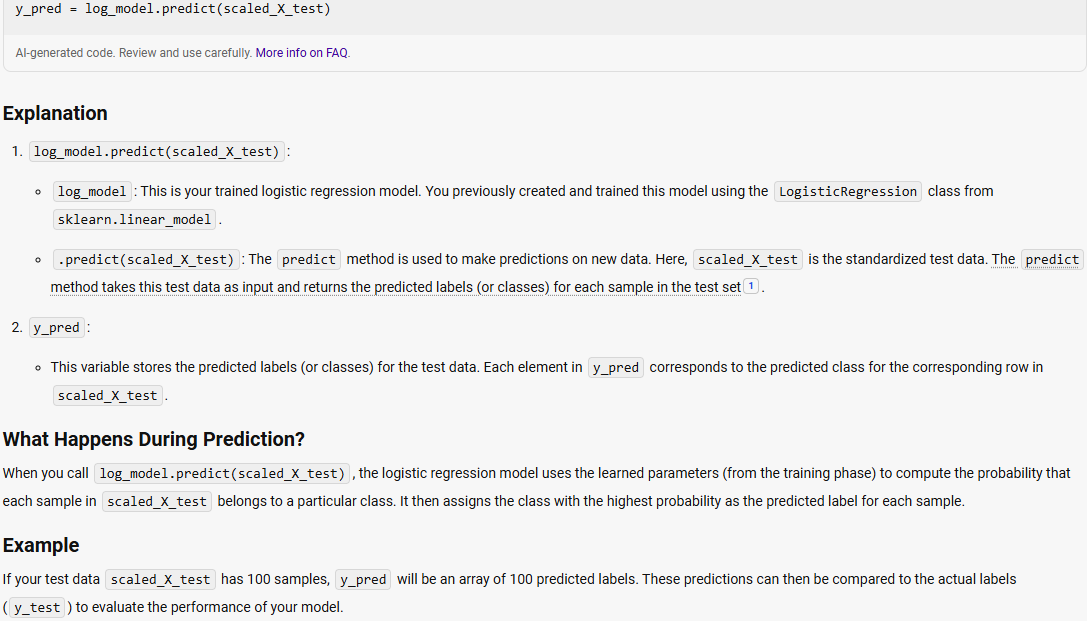

# **🌟 6. Evaluation**

In [ ]:
#Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report #classification_report: This function builds a text report showing the main classification metrics, including precision, recall, F1-score, and support for each class

conf_matrix = confusion_matrix(y_test,y_pred) #The confusion matrix is a 2x2 matrix for binary classification problems, where:
conf_matrix                                   #The element at (0,0) is the count of true negatives (TN).
                                              #The element at (0,1) is the count of false positives (FP).
                                              #The element at (1,0) is the count of false negatives (FN).
                                              #The element at (1,1) is the count of true positives (TP).

array([[11,  0],
       [ 1,  8]])

Confusion matrix image, taken from internet:

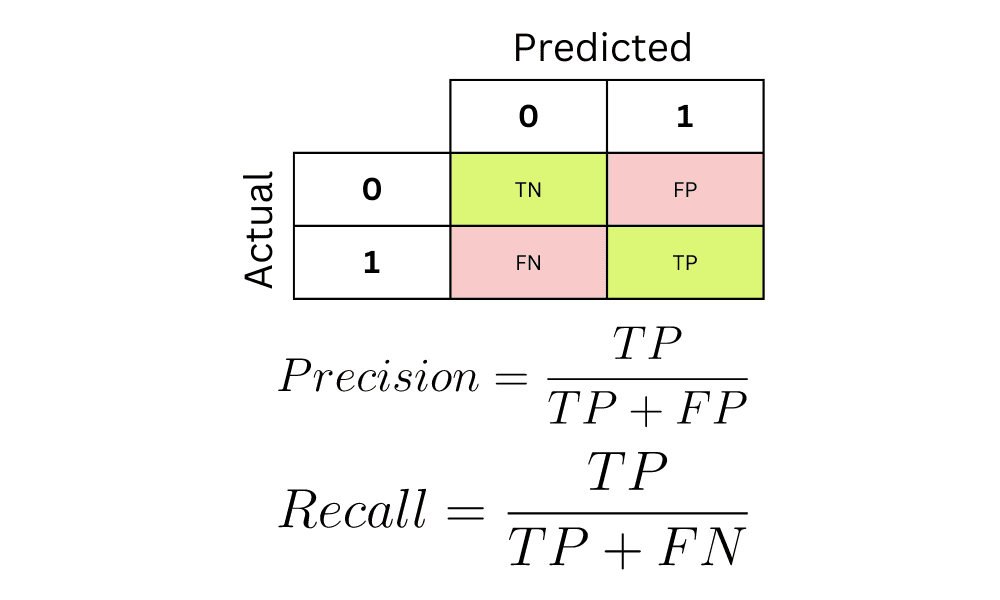

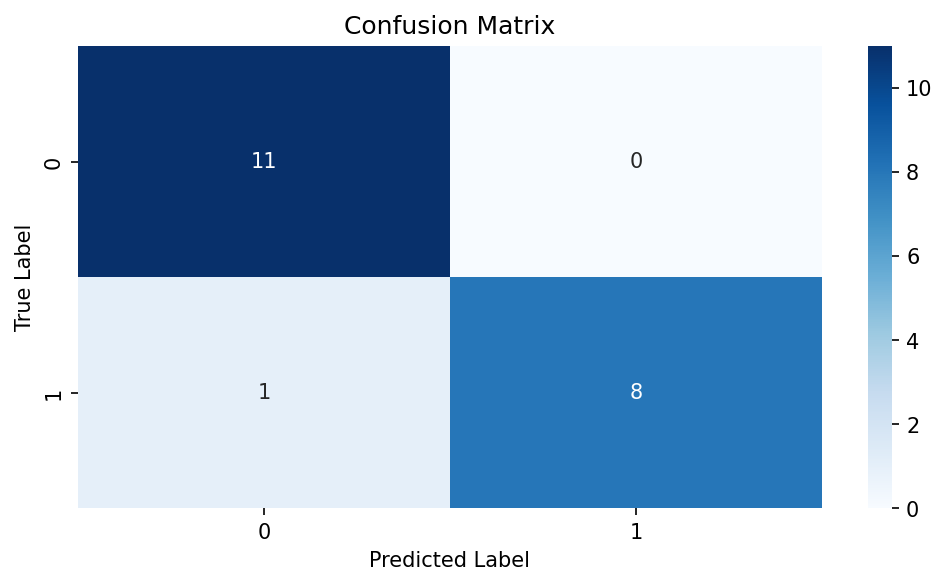

In [ ]:
#Visualizing
plt.figure(figsize=(8, 4), dpi=150)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues') #This parameter adds 'annotations' to the heatmap. When set to 'True', it displays the data values in each cell of the heatmap. 'fmt'' specifies the 'format' of the annotations. 'd' stands for decimal integer, meaning the values will be displayed as integers. 'cmap' sets the 'color map' for the heatmap. 'Blues' is a predefined color map in Seaborn that uses different shades of blue to represent the data values
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#IMPORTANTTTTTTTTTTTTTTTTTTTTTTTTTTTT: OBSERVE THIS CELL ALONG WITH NEXT IMAGES. THESE IMAGES ARE THE EXPLANATION OF WHY I DID ALL THESE HARD WORKS

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



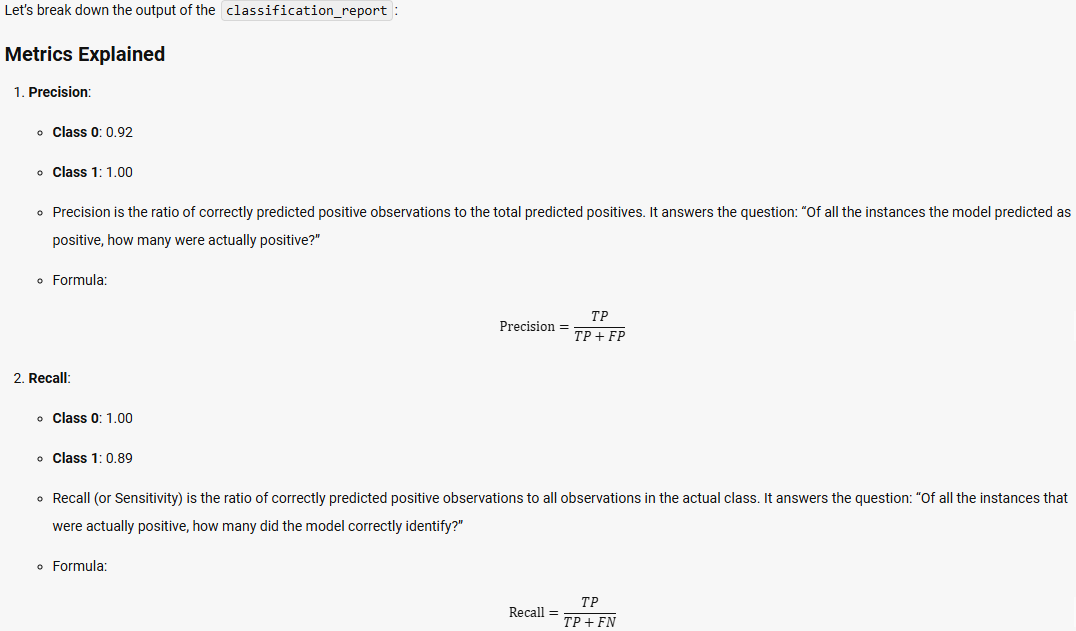

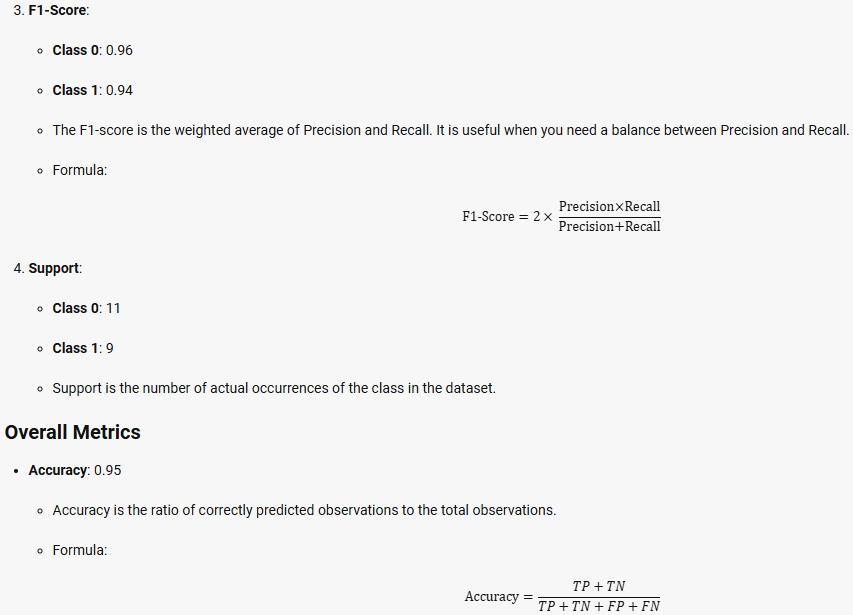

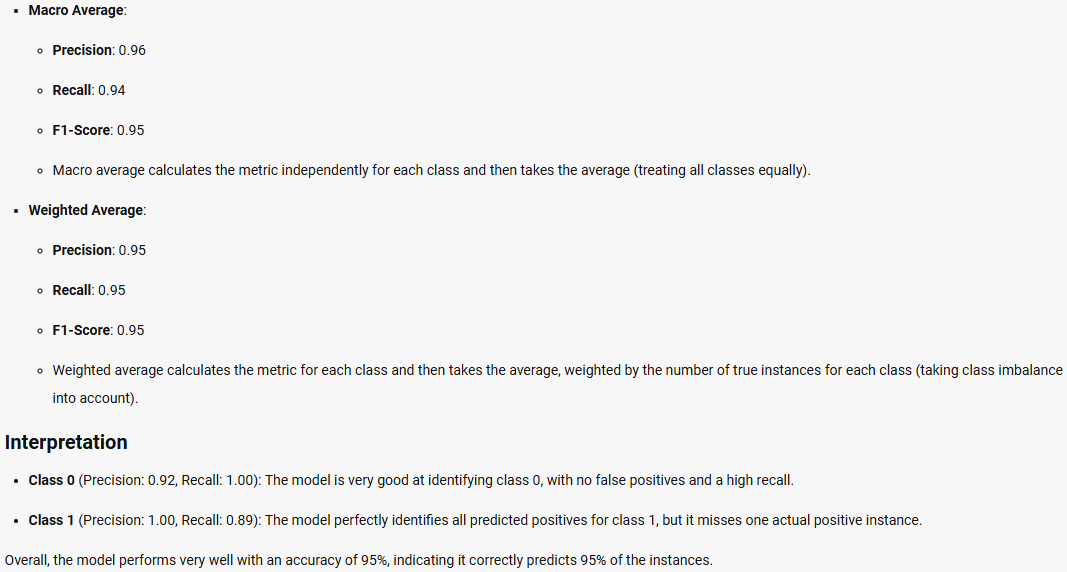

# **🌟 λ. BONUS (Linear Regression)**



> **DUE TO my first learning, I am doing Linear Regression as well. It is even more rewarding or shall I say bonus in the sense that I can use it for further benefit as I can compare it with Logistic Regression. I can then compare between these two and see which algorithm ENDS AS BEST.**

**ANDDDDDDD, It can be an another aspect of 'EVALUATION', that too in 'BEST MANNER'!!🤩🤩🤩**



In [ ]:
#IMPORTANT: RUN THIS TWO TIMES same as Logistic Regression

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

linear_model.fit(scaled_X_train, y_train)

LinearRegression()

In [ ]:
#OBSERVE WITH THE SAME IMPORTANCE WITH THE NEXT IMAGE!
y_pred = linear_model.predict(scaled_X_test)
y_pred

array([ 0.2203098 ,  0.45621631,  0.79421903,  0.1269469 ,  0.09624556,
        0.90657691,  0.76500421,  0.05755416,  0.38942498,  0.27353661,
        0.66439451,  0.12192989,  0.48561694, -0.24937559,  1.27453771,
       -0.27989111, -0.404183  ,  0.86751389,  1.01354615,  0.7199951 ])

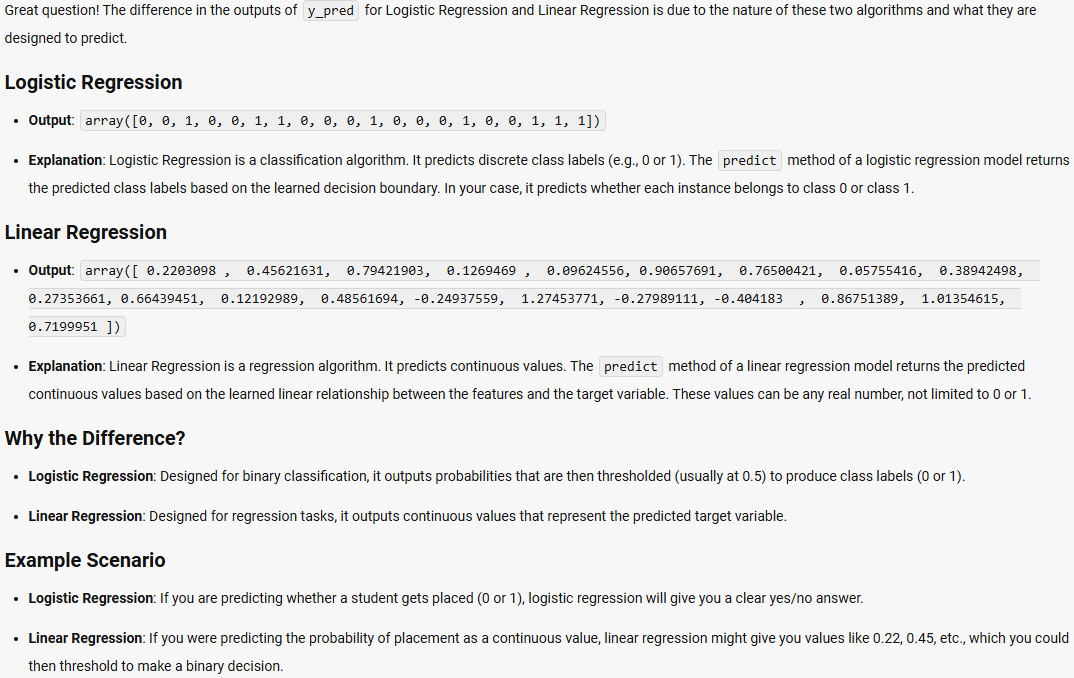

In [ ]:
#Evaluating
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

In [ ]:
MAE,MSE

(0.2380188595403474, 0.07428102432081515)



> **READ:**

The MAE value of approximately 0.23 suggests that, on average, the model's predictions deviate by 0.23 units from the actual values in the test set. Lower MAE values indicate better model performance, and 0.23 is a relatively small error, suggesting that the model is making accurate predictions on average.

The MSE value of approximately 0.067 indicates the average of the squared errors. Since MSE squares the errors, it tends to be more sensitive to large errors than MAE. Like MAE, lower MSE values are desirable. In this case, the relatively small MSE suggests that, on average, the model's predictions have small squared differences from the actual values.

In [ ]:
#IMPORTANT: OBSERVE ALONG NEXT IMAGES
linear_model.coef_ #'linear_model.coef_' (an attribute) is used to access the coefficients (weights) of the features in a linear regression model after it has been trained. These coefficients represent the relationship between each feature and the target variable. Specifically, they indicate how much the target variable is expected to change when a feature changes by one unit, holding all other features constant

array([0.40891121, 0.00700224])

X1 and X2 refers to independent variables or features. Just like 'cgpa' and 'iq' columns here.

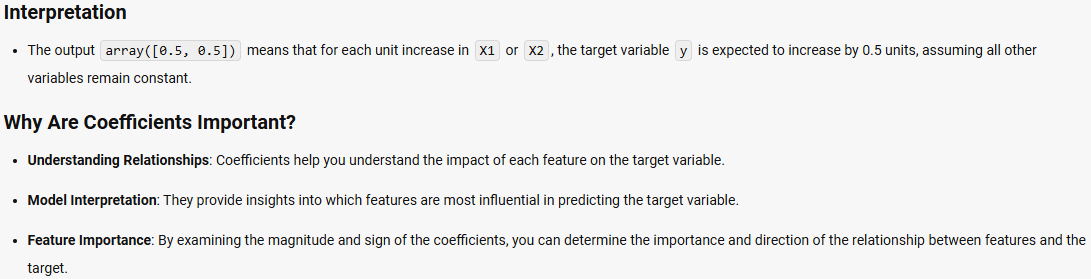

IGNORE texts on MAE and MSE.

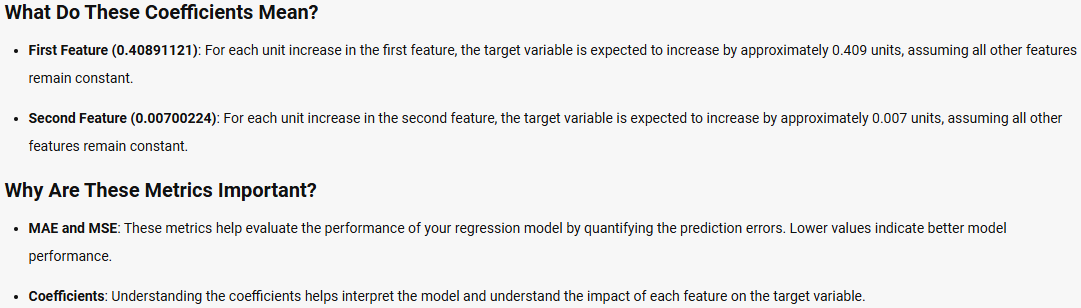

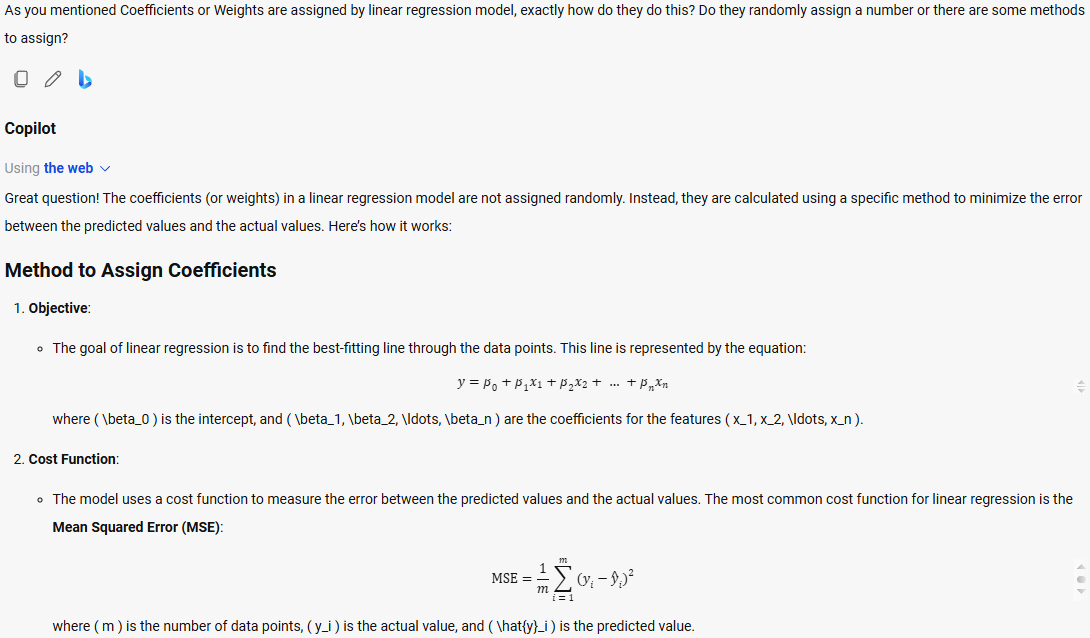

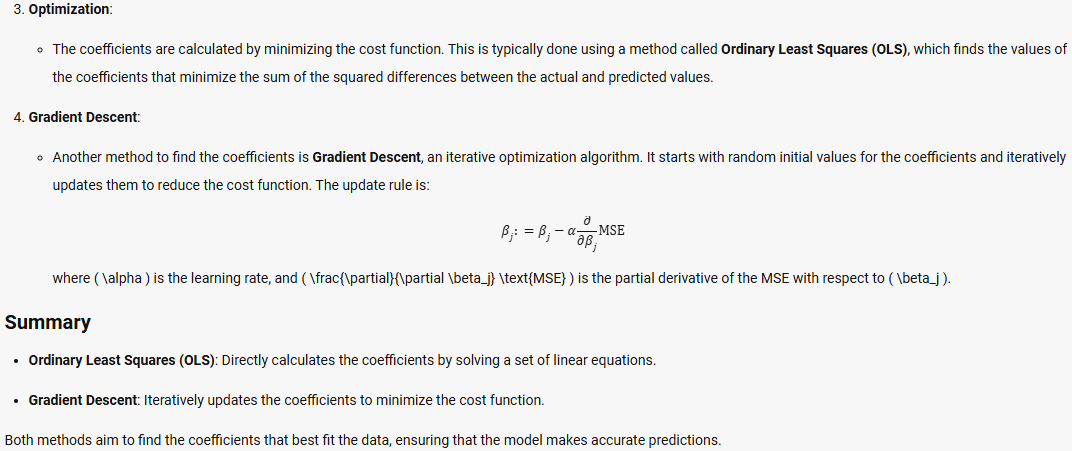



> **IMPORTANT, NOTICEEEEEEEEEEEEEEE FOLLOWING TEXTS IN NEXT IMAGES:**

**1. The MSE calculation in your code is for evaluating the model’s performance 'after the coefficients have been determined'. NOTICE, 'AFTERRRRRRR'! That means the Coefficients are already have been calculated EVEN BEFORE I CALCULATED MSE.** ***READ THE BELOW POINT TO GET CLEAR***

**2. Fit the Model: 'The model calculates the coefficients using OLS or another method'.**

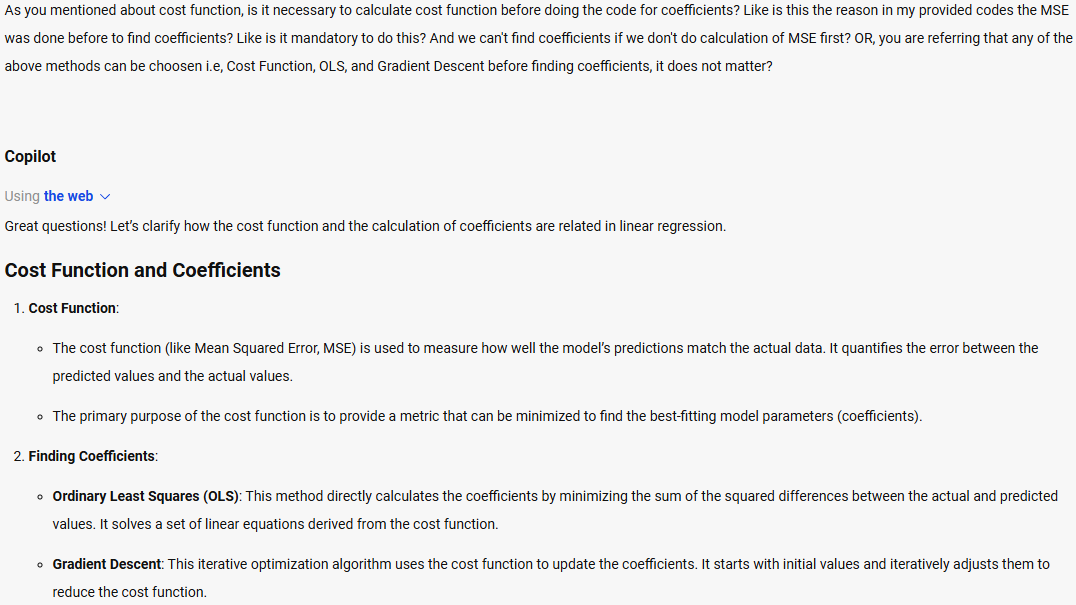

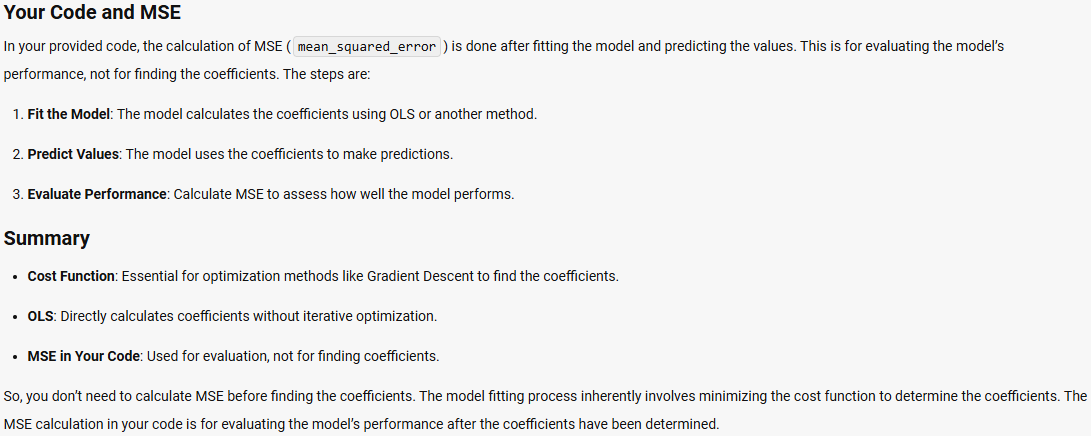

In [ ]:
#IMPORTANT: OBSERVE ALONG NEXT IMAGES
coeff_df = pd.DataFrame(linear_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
cgpa,0.408911
iq,0.007002


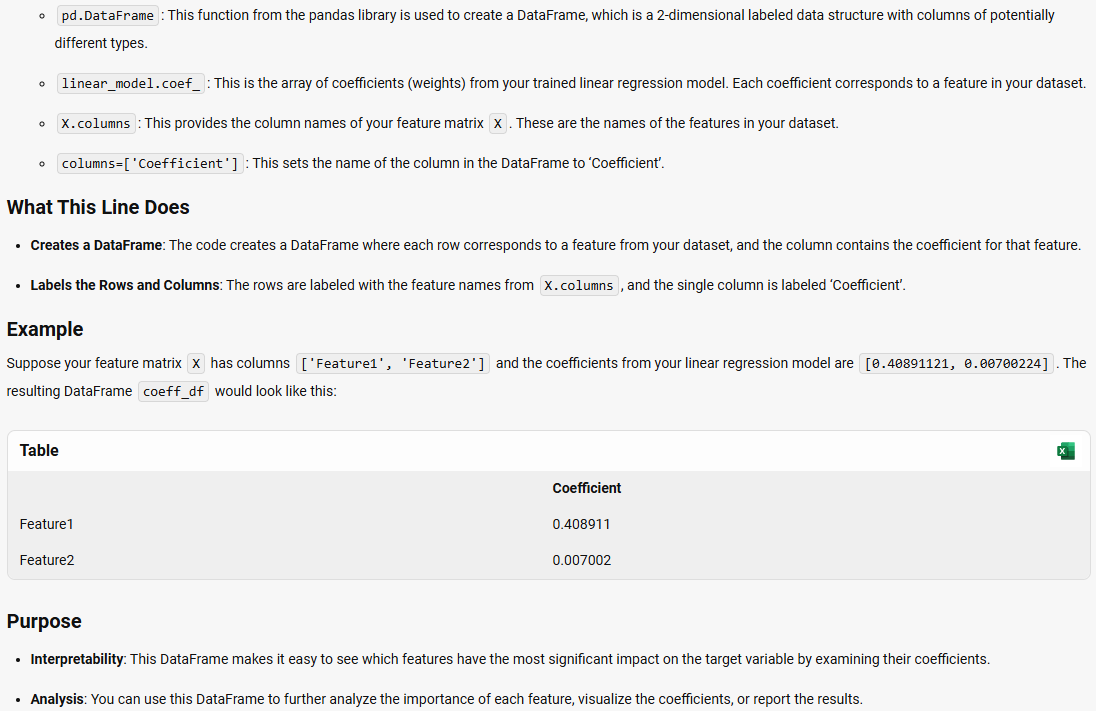



> ***IMPORTANTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT***

**MOST SIGNIFICANT IMPACT**

The feature with the highest absolute coefficient value has the most significant impact on the target variable. In this case, the first feature, cgpa, has a coefficient of approximately 0.409, which is much larger than the coefficient of the second feature 'iq'(approximately 0.007).

In [ ]:
df.corr() #strong correlation between good cgpa and placement. Hence, proved that which one has most significant on target

,cgpa,iq,placement
cgpa,1.000000,-0.098791,0.821688
iq,-0.098791,1.000000,-0.083031
placement,0.821688,-0.083031,1.000000


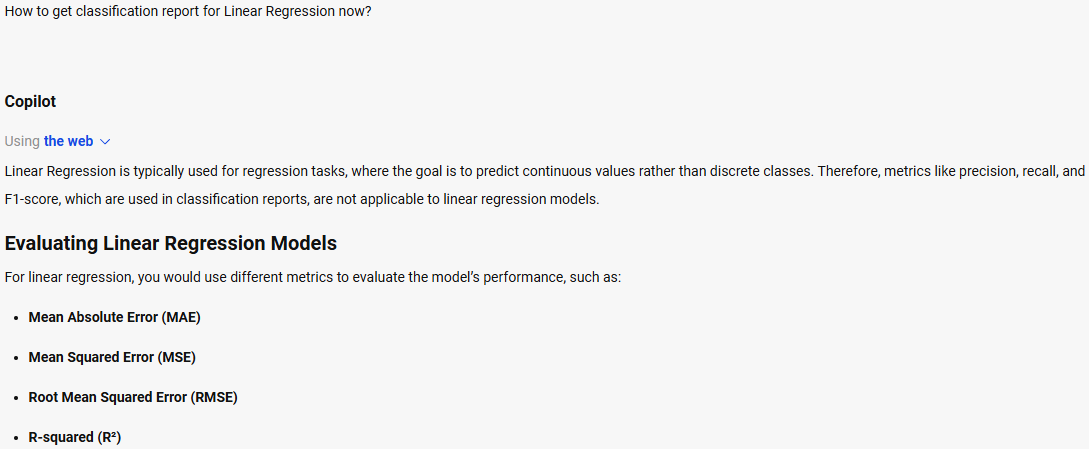

# **🌟 7. Testing**

In [ ]:
#Creating a new student variable with code explanations below
test_student = X_test.iloc[0]
test_student

,16
cgpa,5.2
iq,224.0


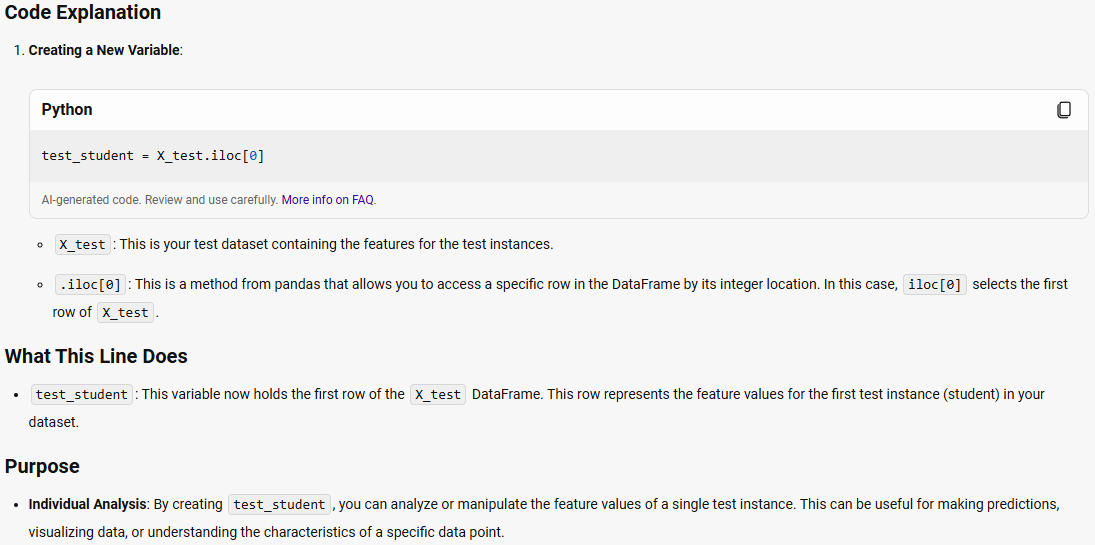

In [ ]:
log_model.predict(test_student.values.reshape(1, -1)) #working model. Code explanation is given below

array([1])

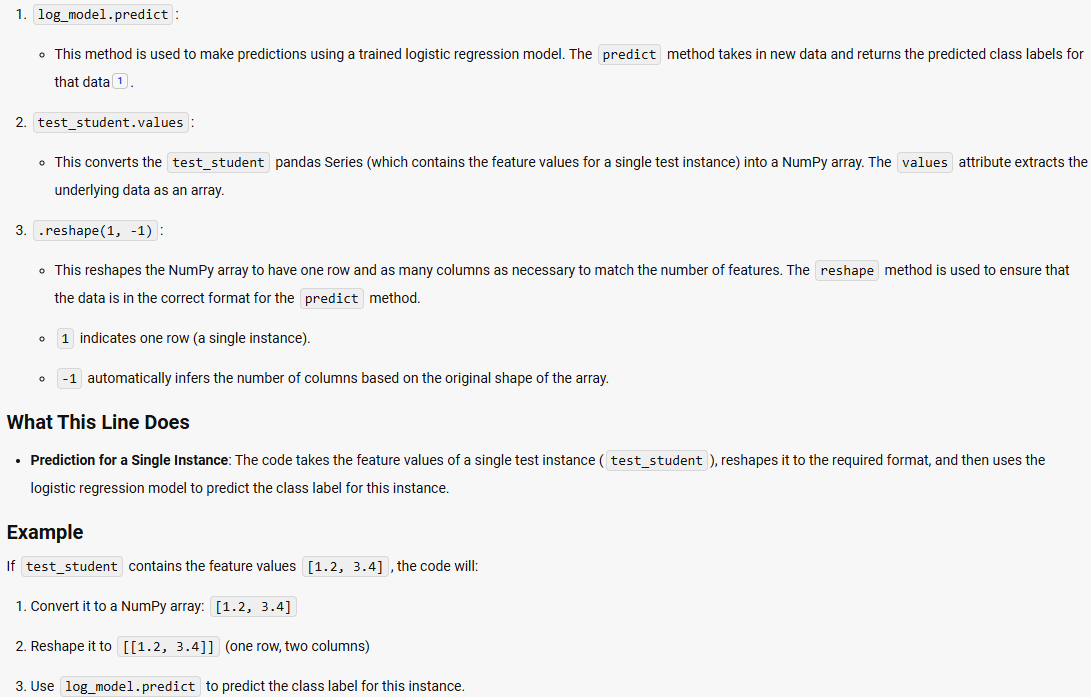

**QUESTION:** ***Does reshaping here making it a 2D-array? I am saying this is because of two brackets '[[]]'.***

*The answer is given in next image:*

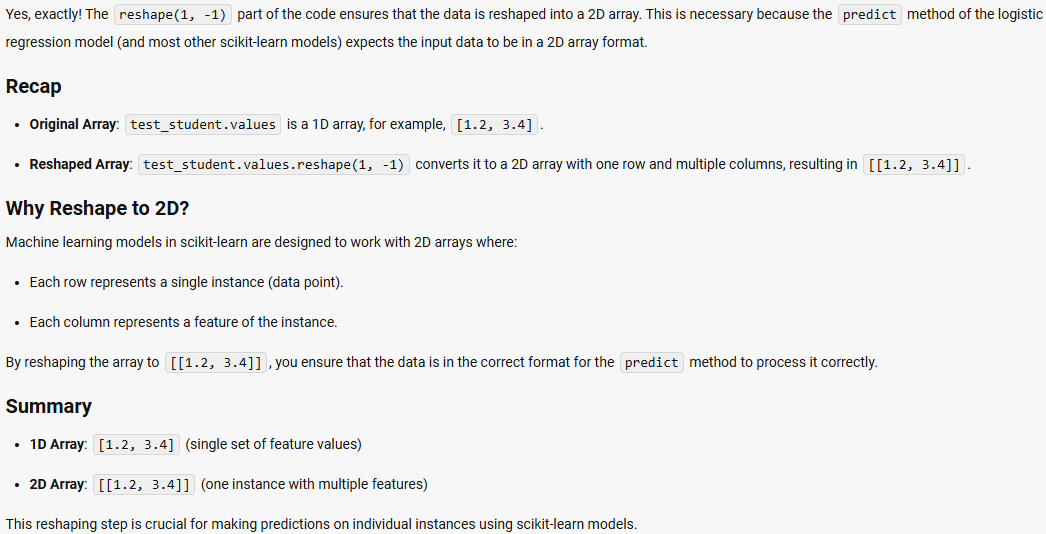

> ***IMPORTANTTTTTTTTTTTTTTTTT: THESE FACTS ARE SAME FOR BOTH Linear Regression AND KNN***

In [ ]:
y_test.iloc[0] #testing placement

0



> The model predicted the placement of the student correctly!





> Now,



In [ ]:
test_student2 = y_test.iloc[5] #IMPORTANTTTTTTTTTTTTTTTTTT: SEE, it is giving direct result from the 'placement' column! But, however, THIS IS NOT "MACHINEEEEEEEEEEEEEEEE LEARNINGGGGGGGGGGGGGGGGG AT ALLLLLLLLLLLLLLLLLLLLLLL'!! 'cause this is just doing a work which is funny!!🤣🤣🤣 That is, 'JUST TAKING' VALUE FROM 'y_test' and displaying it!!🤣🤣🤣 The normal 'NumPy operation'!!🤣🤣🤣
test_student2                  #SOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO, BE CAREFUL ABOUT THESE 'SILLY MISTAKES'.🙂🙂🙂 'THESE PERHAPS, INFLUENCE A VERY HIGH TOLL ON MY CAREER'!!🙂
                               #'MUST ALWAYS FOLLOW PROCESS. EVEN THOUGH THAT HERE WE ARE DOING THE 'EXACT SAME THING ('y_test.iloc[index]' for both Logistic and Linear models)' IN THE END'!!
                               #[ACTUALLY I DONNO 'WHAT I AM SAYING 'HERE IN THIS VERY CELL' OR DOING]

1

In [ ]:
test_student3 = X_test.iloc[6]
test_student3

,97
cgpa,6.7
iq,182.0


In [ ]:
linear_model.predict(test_student3.values.reshape(1, -1)) #BONUS model

array([4.52661247])

In [ ]:
y_test.iloc[6]

1



> *Ending note from the GitHub author: In summary, each model exhibited favorable predictive capabilities, with Logistic Regression excelling in accuracy and KNN performing optimally with an appropriate choice of k. The choice of the best model may depend on specific considerations, such as interpretability, computational efficiency, and the importance of false positives and false negatives in the placement prediction task. Thank you*





> *END OF THE GitHub WORK*



In [ ]:
#Some more I found 'after finishing this notebook (?!!)'!!😅

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets



> **Cool!!🤣🤣🤣**



In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=log_model, legend = 2)

ValueError: X must be a NumPy array. Found <class 'pandas.core.frame.DataFrame'>

**🤣🤣🤣**



> ***MAN!! ANOTHER IMPORTANTTTTTTTTTTTTTT THING CAME UP!!🥺***



In [ ]:
import pickle
pickle.dump(log_model, open('model.pkl', 'wb')) #see the file section of this notebook! The 'model' appeared there which is just created with 'this line of codes'